WTZMIC001 Assignment 2
Julia Exercise 2.5.1

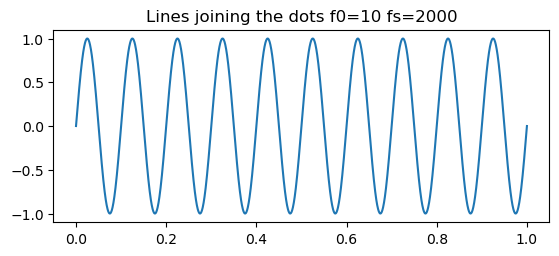

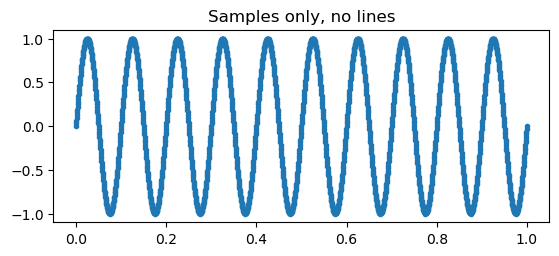

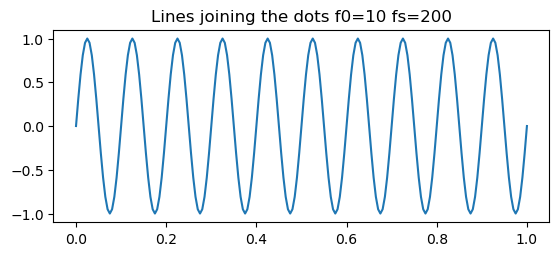

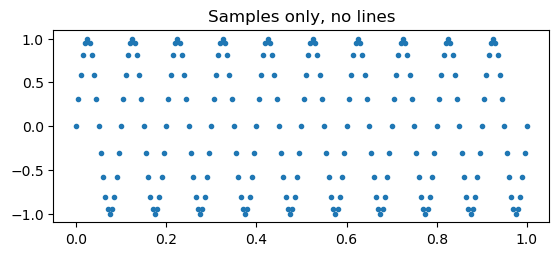

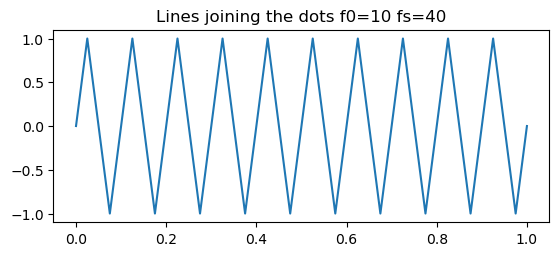

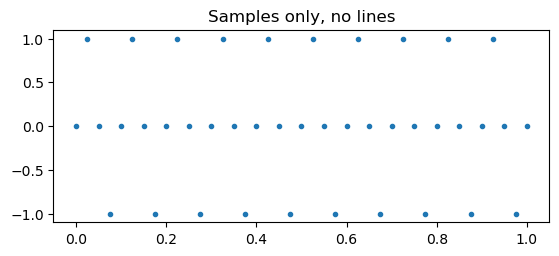

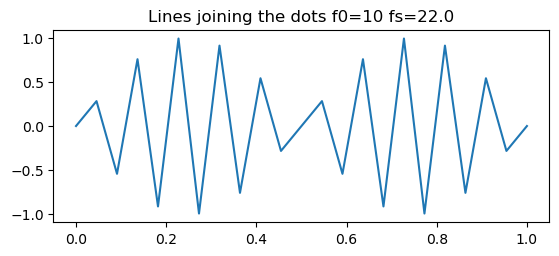

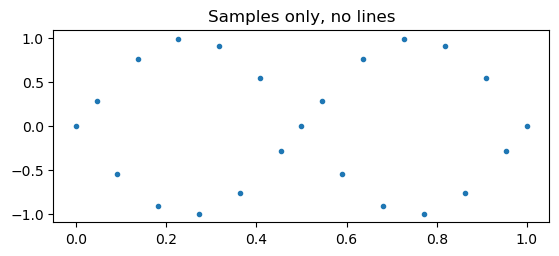

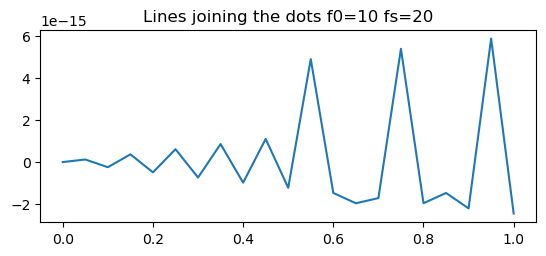

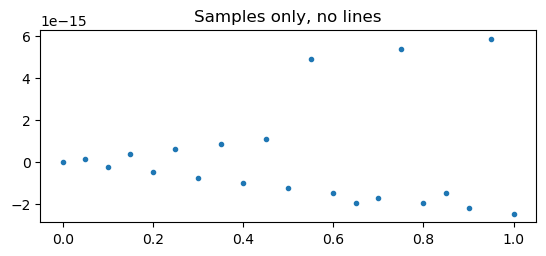

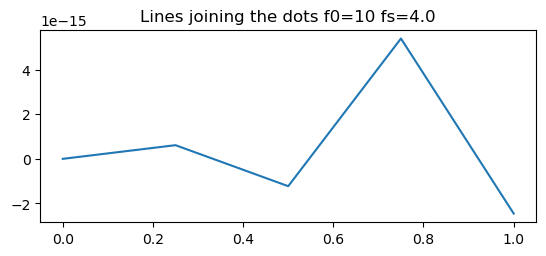

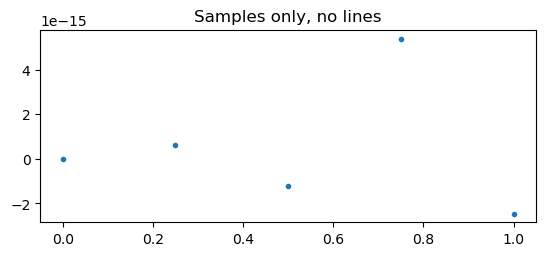

PyObject Text(0.5, 1.0, 'Samples only, no lines')

In [3]:

using PyPlot

function myplot(k)
 f0 = 10
 T0 = 1/f0
 fnyquist = 2*f0 # Calculate Nyquist rate
 fs = k*fnyquist # Define sample rate
  if (k < 1)
        fs = fs - f0
    end
 Δt = 1/fs
 t = 0:Δt:10*T0;
 x = sin.(2*pi*f0*t); # Create array containing function to be plotted
 # using PyPlot
 myfigsize=(6.4,2.5); # figure size 
 figure(figsize=myfigsize)
 plot(t,x);
 title("Lines joining the dots f0=$(f0) fs=$(fs)")
 figure(figsize=myfigsize)
 plot(t,x,".")
 title("Samples only, no lines")
end


myplot(100)
myplot(10)
myplot(2)
myplot(1.1)
myplot(1)
myplot(0.7)

2.5.2

fft(x) = ComplexF64[2.0 + 0.0im, 0.7071067811865476 - 1.7071067811865475im, -1.0 - 1.0im, -0.7071067811865476 + 0.2928932188134524im, 0.0 + 0.0im, -0.7071067811865476 - 0.2928932188134524im, -1.0 + 1.0im, 0.7071067811865476 + 1.7071067811865475im]
dft(x) = ComplexF64[2.0 + 0.0im, 0.7071067811865477 - 1.7071067811865475im, -0.9999999999999999 - 1.0000000000000002im, -0.7071067811865477 + 0.2928932188134524im, 0.0 + 1.2246467991473532e-16im, -0.7071067811865474 - 0.29289321881345254im, -1.0000000000000002 + 0.9999999999999997im, 0.7071067811865469 + 1.7071067811865477im]
invX = ifft(X) = ComplexF64[0.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, -5.551115123125783e-17 + 0.0im, 0.0 + 0.0im, -5.551115123125783e-17 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im]


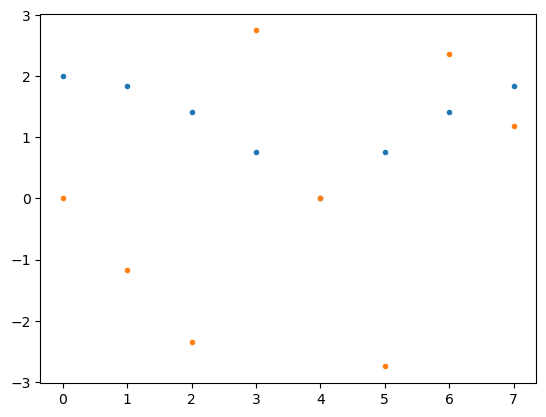

8-element Vector{ComplexF64}:
                    0.0 + 0.0im
                    1.0 + 0.0im
                    1.0 + 0.0im
 -5.551115123125783e-17 + 0.0im
                    0.0 + 0.0im
 -5.551115123125783e-17 + 0.0im
                    0.0 + 0.0im
                    0.0 + 0.0im

In [6]:
function dft(x)
    N=length(x)
    X = zeros(N)+im*zeros(N) # Complex array of 0+0im; Another method is X=zeros(ComplexF64,N)
    for k=1:N
         for n=1:N
             X[k] = X[k] + x[n]*exp(-im*2*pi*(k-1)*(n-1)/N)
        end
    end
    return X
end

#a) The numbers are very close. Theres a minor difference but this can only be seen 16 decimal places down the line
x = [0,1,1,0,0,0,0,0]
using FFTW
@show fft(x);
@show dft(x);
 
#b)
X = fft(x);
plot( abs.(X),".")
plot( angle.(X),".")

#c)
@show invX = ifft(X)

In [14]:
#d)
function timing_test(N)
    x = randn(N);
    #t_dft = @elapsed dft(x);
    t_fft = @elapsed fft(x);
    #println("dft of length $(N) took $(t_dft) seconds")
    println("fft of length $(N) took $(t_fft) seconds")
end

#N=256 # N=2^10 = 1024, N=2^11 = 2028, N=2^12 = 4096
#=timing_test(N)
N=2^10
timing_test(N)
N=2^11
timing_test(N) =#
N=2^15
timing_test(N)
N=32767
timing_test(N)

fft of length 32768 took 0.002872625 seconds
fft of length 32767 took 0.002036458 seconds


2.5.3

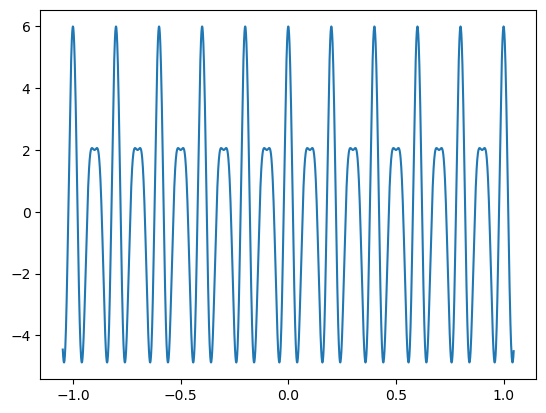

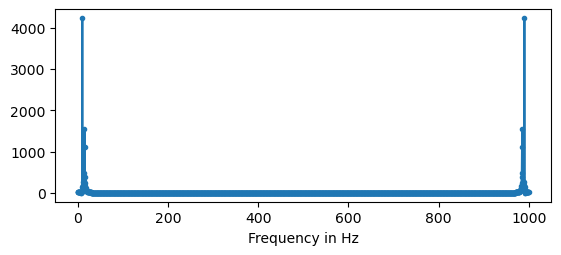

In [15]:
t1 = -pi/3; t2 = pi/3; dt = 0.001
t = t1:dt:t2

a = 4*cos.(20*pi*t)
#figure(), plot(t,a)

b = 2cos.(30*pi*t)
#figure(), plot(t,b)

h = a + b
figure(), plot(t,h)

H = fft(h)

N = length(t);
Δf = 1/(N*dt)
f_axis = (0:N-1)*Δf; 

figure(figsize=(6.4,2.5)); 
plot(f_axis, abs.(H),".-");
xlabel("Frequency in Hz");

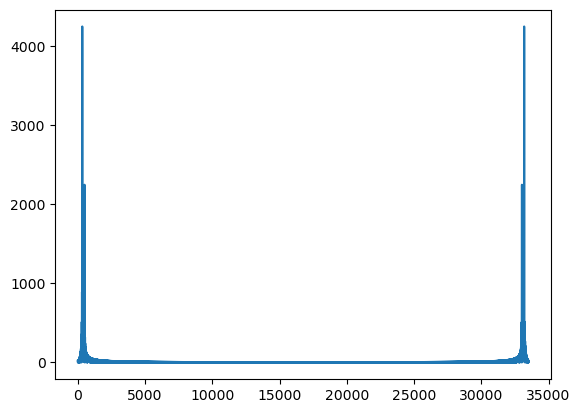

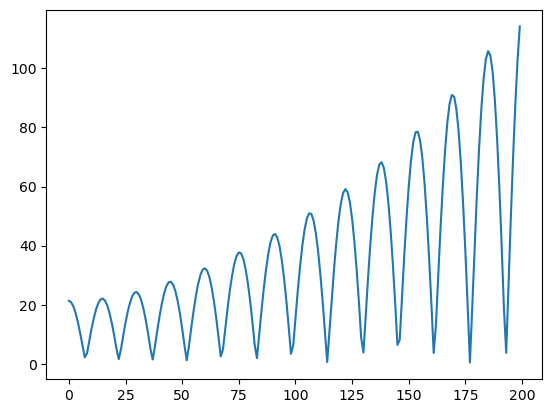

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x13a1987c0>

In [16]:
N = length(h)
y = zeros(16*N) # Make array 16x longer.
y[1:N] = h; # Copy x into first N samples. The rest contains zeros.
Y = fft(y);
plot(abs.(Y)) # Again, zoom in if required.

figure(); plot(abs.(Y[1:200]))

b) You see the magnitude of sinosoids increasing with frequency

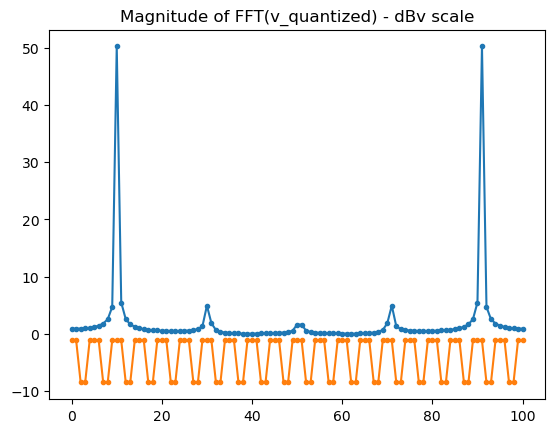

PyObject Text(0.5, 1.0, 'Magnitude of FFT(v_quantized) - dBv scale')

In [7]:
f0 = 10
T0 = 1/f0
dt = 0.01
t = 0-5*T0:dt:0+5*T0

v = cos.(2*pi*f0*t)

Nbits = 3 # Try 2, then 3, then 4 etc.
Nlevels = 2^Nbits
Amax = 1+0.00001 # Add a small amount to prevent problem at extreme
Amin = -1-0.00001
v_quantized = (round.( (v .- Amin)/(Amax-Amin)*Nlevels .- 0.5) .+0.5) /
Nlevels*(Amax-Amin) .+ Amin;
plot(abs.(fft(v_quantized)),".-")
# Try a dBv scale to see wide dynamic range.
plot(20*log10.(abs.(v_quantized)),".-");
title("Magnitude of FFT(v_quantized) - dBv scale")




In the fourier domain it adds some extra hormanics at about w = 30Hz position. This I believe is non-Ideal

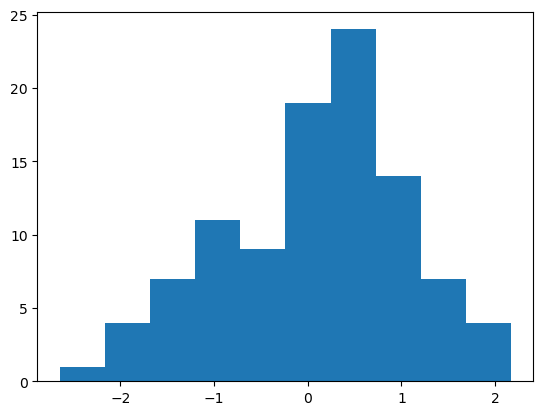

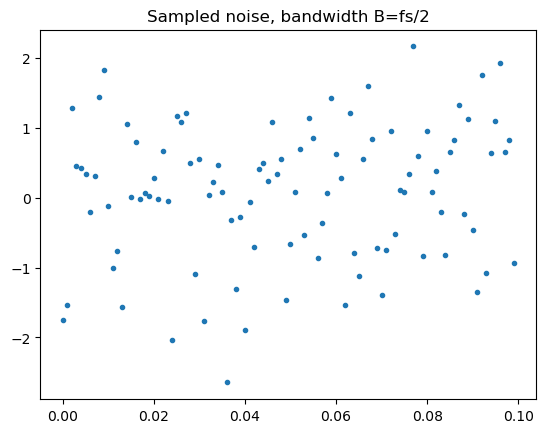

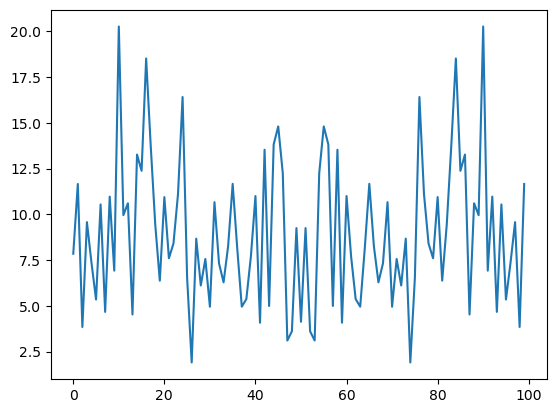

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x13a1ee8f0>

In [8]:
fs = 1000 # sample rate in Hz
Δt=1/fs; # sample spacing in s
N = 100 # Choose an even number (makes like easier later)
t = range(0, step=Δt, length=N) # Define time axis
σ = 1
x = σ * randn(N); # Create the random samples with std dev of σ.
figure(); hist(x,bins=10) # inspect histogram
figure(); plot(t,x,".") # inspect sampled time domain
title("Sampled noise, bandwidth B=fs/2")
X = fft(x);
figure(); plot(abs.(X)) # inspect DFT frequency domain

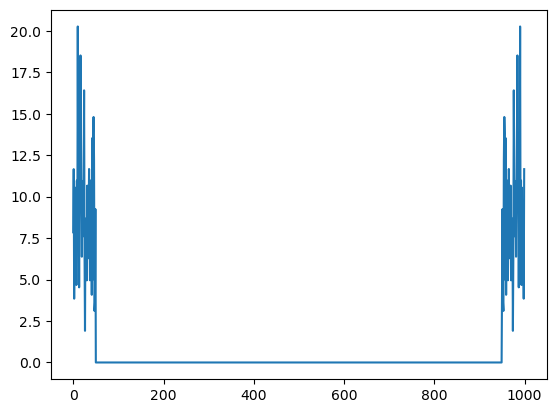

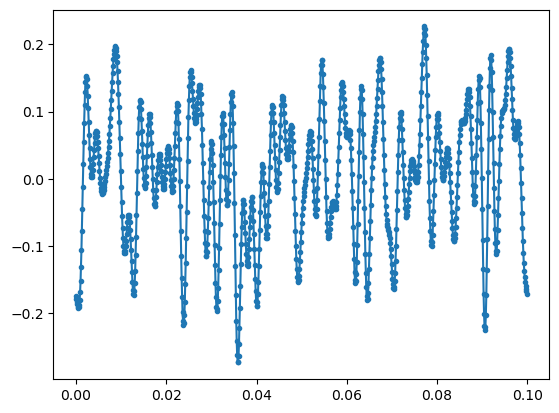

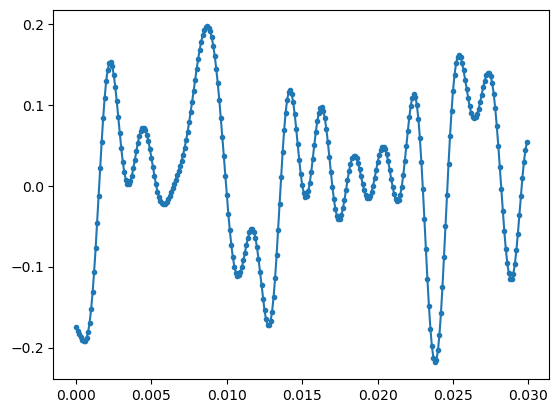

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x13a477460>

In [9]:
pad_factor=10
Ny = pad_factor*N;
Y = zeros(Ny)+im*zeros(Ny) # Create a complex array of zeros
k_mid = Int(N/2)
Y[1:k_mid]=X[1:k_mid]; # Insert the first half of X
Y[Ny-k_mid+1:Ny]=X[k_mid+1:N]; # Insert the 2nd half of X at the end
figure(); plot(abs.(Y)); # inspect padded array
y = ifft(Y); # Go back to time domain
y = real(y); # discard the very tiny imaginary components
Ny = length(y)
t_new = range(0, step=Δt/pad_factor, length=Ny) # Define time axis
figure(); plot(t_new,y,".-")
figure(); plot(t_new[1:300],y[1:300],".-") # Plot just first 300 samples

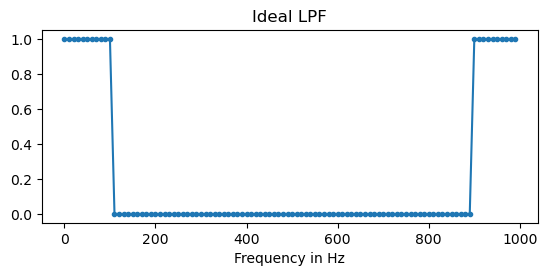

PyObject Text(0.5, 24.000000000000007, 'Frequency in Hz')

In [10]:
# Create a Filter transfer function
Δω = 2*pi/(N*Δt) # Sample spacing in freq domain in rad/s
ω = 0:Δω:(N-1)*Δω
f = ω/(2*π)
B = 100 # filter bandwidth in Hz
# In the sampled frequency domain. add a rect centred on zero to one centred at 
# i.e. centred on 0 rad/s an on 2pi/Δt rad/s.
rect(t) = (abs.(t).<=0.5)*1.0;
H = rect(ω/(4*π*B)) + rect( (ω .- 2*π/Δt)/(4*π*B) );
figure(figsize=(6.4,2.5));
plot(f,H,".-"); # Note, H in this case is purely real.
title("Ideal LPF")
xlabel("Frequency in Hz")

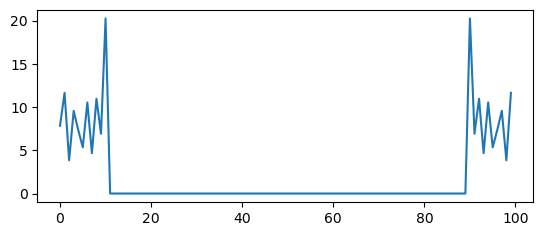

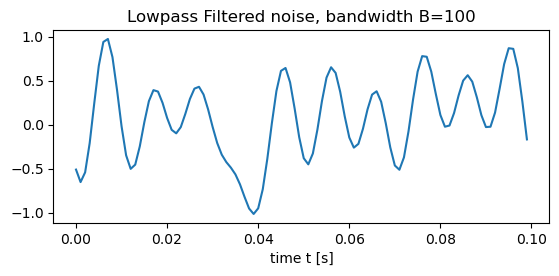

PyObject Text(0.5, 24.000000000000007, 'time t [s]')

In [11]:
X_filtered = X.*H;
figure(figsize=(6.4,2.5)); PyPlot.plot(abs.(X_filtered))
x_filtered = ifft(X_filtered)
x_filtered = real(x_filtered)
figure(figsize=(6.4,2.5)); PyPlot.plot(t,x_filtered)
title("Lowpass Filtered noise, bandwidth B=$(B)")
xlabel("time t [s]")


Many of the compnents are filtered away. There is a smaller frequency of the noise. WHich makes sence, all the low frequencies have been filtered and removed

2.5.6

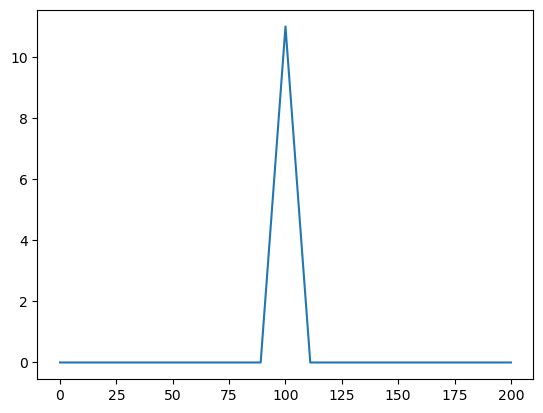

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x14ff89270>

In [19]:
#3.6.1

t = 0:0.1:20; T=1;
x = rect( (t.-T)/T ) # shift by T, so it starts at t>0
y = x # same as x
x_corr_y = ifft( conj( fft(x) ) .* fft(y) );
plot( fftshift( real( x_corr_y ) ))

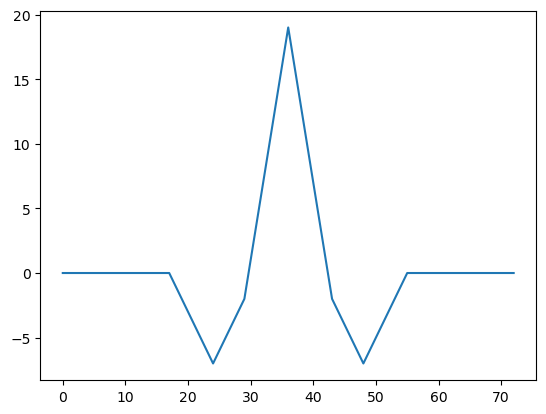

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x16d3feb60>

In [13]:
A = 1
y = -A*rect( (t.-T/2)/T) .+ A*rect( (t.-2*T)/(2*T));
u = y
y_corr_u = ifft( conj( fft(y) ) .* fft(u) );
plot(fftshift( real( y_corr_u ) ))